Grade=95/100

**ASTRO 361 - Lab 5**

**Zack Felker**

**Introduction:**

In this lab, we use the methods learned in Lab 4 to flatten an actual raw science image taken at Kitt Peak. We will then use astrometry.net to identify objects in the frame.

**Methods:**

We begin by importing libraries, reading in the data, and defining functions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy import ndimage
from numpy import *
from scipy import optimize
from scipy import stats
from IPython.display import Image
#Takes: file name (str), number of files (int). 
#    [number] data sets in form [name] + "i" + ".fits" where i goes from 1 to [number]
#Returns: a list containing fits objects. 
def getData(name, number):
    out = []
    for i in range (1, number + 1):
        fileName = name + str(i) + '.fz'
        temp = fits.getdata(fileName)
        out.append(temp)
    return out

bias = np.array(getData('bias', 10))
flat = np.array(getData('flat', 10))
raw = getData('raw', 1)[0]
cal = getData('cal', 1)[0]
master = getData('master', 1)[0]
bias = np.float64(bias)
flat = np.float64(flat)
raw = np.float64(raw)
cal = np.float64(cal)
master = np.float64(master)
bias = [x[0:4096,200:2136] for x in bias]
flat = [x[0:4096,200:2136] for x in flat]
raw = raw[0:4096,200:2136]
cal = cal[0:4096,200:2136]
master = master[0:4096,200:2136]

def average(array):
    temp = array[0]
    for i in range (1, len(array)):
        temp = temp + array[i]
    return temp / len(array)

To flatten the image, we simply subtract the average bias frame and divide by the average of the flats, after normalizing the latter to have a mean of 1. We perform this procedure and write the corrected frame out as a file.

In [2]:
biasAvg = average(bias)
flatAvg = average(flat)
adjustment = (flatAvg - biasAvg) / np.mean(flatAvg - biasAvg)
corrected = np.divide((raw - biasAvg), adjustment)
fits.writeto('corrected.fits', corrected, clobber = True)

We can then compare the various images.

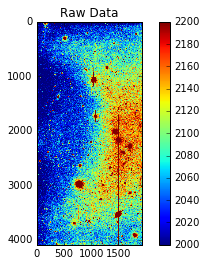

In [3]:
plt.imshow(raw - biasAvg, vmin = 2000, vmax = 2200)
plt.colorbar()
plt.title('Raw Data')
plt.show()

This is the raw image. Notice the largescale diffraction effects visible as a "doughnut" in the image.

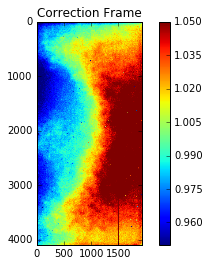

In [4]:
plt.imshow(adjustment, vmin = 0.95, vmax = 1.05)
plt.colorbar()
plt.title('Correction Frame')
plt.show()

This is our normalized flat frame. After subtracting the average bias form the raw frame, we divide by this to obtain our corrected image.

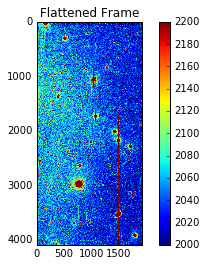

In [5]:
plt.imshow(corrected, vmin = 2000, vmax = 2200)
plt.colorbar()
plt.title('Flattened Frame')
plt.show()

This is the result. Compare it to the professionally corrected image below

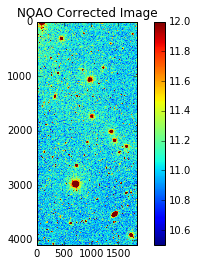

In [6]:
plt.imshow(cal, vmin = 10.5, vmax= 12)
plt.colorbar()
plt.title('NOAO Corrected Image')
plt.show()

The two are remarkably close. Next, we open our corrected frame in Aladin. We use the RA and DEC from the header of the raw file and apply it to the corrected file to allow us to overlay catalog objects. The image below shows the result of this.

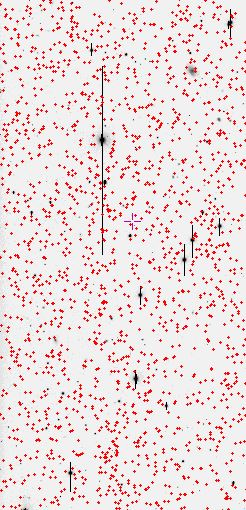

In [7]:
Image(filename='Capture1.JPG')

The dots are obviously nonsense. The header file is simply not accurate enough. To fix this, we feed our corrected image to astrometry.net to be processed. After we get the new file back, we read it with Aladin and try again to overlay catalogue objects. The results are below.

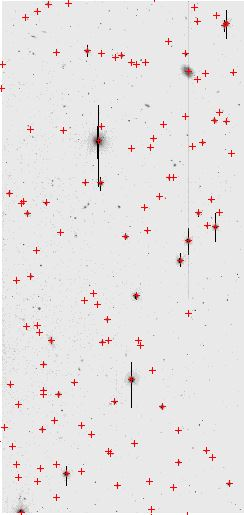

In [8]:
Image(filename='Capture2.JPG') 

The catalogue objects now appear precicely over objects in the image. We can simply click on these red crosses to determine which object a given observation belongs.

**Conclusions:**

It is much easier than I would have imagined to flatten and fit catalogue objects to raw data. It of course helps that the hard work has been done by the people who run Astrometry.net.